In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Airbnb_Open_Data.csv")
data

C:\Users\JB\AppData\Local\Temp\ipykernel_7072\136929031.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Airbnb_Open_Data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


# DROP AND CORRECT SOME COLUMNS


In [3]:
columns_to_keep = ['NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
        'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', ]
columns_to_drop =['review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license', 'country code','id','reviews per month',]

In [4]:
data.drop(columns=columns_to_drop, errors='ignore', inplace=True)

data.columns =( data.columns
               .str.strip()
               .str.upper()
               )

data

,NAME,HOST ID,HOST_IDENTITY_VERIFIED,HOST NAME,NEIGHBOURHOOD GROUP,NEIGHBOURHOOD,LAT,LONG,COUNTRY,INSTANT_BOOKABLE,CANCELLATION_POLICY,ROOM TYPE,CONSTRUCTION YEAR,PRICE,SERVICE FEE,MINIMUM NIGHTS,NUMBER OF REVIEWS,LAST REVIEW
0,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021
1,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022
2,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN
3,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019
4,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,False,flexible,Private room,2003.0,$844,$169,1.0,0.0,NaN
102595,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,True,moderate,Private room,2016.0,$837,$167,1.0,1.0,7/6/2015
102596,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,True,moderate,Private room,2009.0,$988,$198,3.0,0.0,NaN
102597,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,True,strict,Entire home/apt,2015.0,$546,$109,2.0,5.0,10/11/2015


# CAPITALIZED THE CELLS  




In [5]:
cols = [
    'NAME',
    'NEIGHBOURHOOD',
    'COUNTRY',
    'CANCELLATION_POLICY',
    'HOST_IDENTITY_VERIFIED',
    'ROOM TYPE'
]

data[cols] = data[cols].apply(
    lambda col: col.map(lambda v: v.capitalize() if isinstance(v, str) else v)
)


data

,NAME,HOST ID,HOST_IDENTITY_VERIFIED,HOST NAME,NEIGHBOURHOOD GROUP,NEIGHBOURHOOD,LAT,LONG,COUNTRY,INSTANT_BOOKABLE,CANCELLATION_POLICY,ROOM TYPE,CONSTRUCTION YEAR,PRICE,SERVICE FEE,MINIMUM NIGHTS,NUMBER OF REVIEWS,LAST REVIEW
0,Clean & quiet apt home by the park,80014485718,Unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United states,False,Strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021
1,Skylit midtown castle,52335172823,Verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United states,False,Moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022
2,The village of harlem....new york !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United states,True,Flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN
3,NaN,85098326012,Unconfirmed,Garry,Brooklyn,Clinton hill,40.68514,-73.95976,United states,True,Moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019
4,Entire apt: spacious studio/loft by central park,92037596077,Verified,Lyndon,Manhattan,East harlem,40.79851,-73.94399,United states,False,Moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,Spare room in williamsburg,12312296767,Verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United states,False,Flexible,Private room,2003.0,$844,$169,1.0,0.0,NaN
102595,Best location near columbia u,77864383453,Unconfirmed,Mifan,Manhattan,Morningside heights,40.80460,-73.96545,United states,True,Moderate,Private room,2016.0,$837,$167,1.0,1.0,7/6/2015
102596,"Comfy, bright room in brooklyn",69050334417,Unconfirmed,Megan,Brooklyn,Park slope,40.67505,-73.98045,United states,True,Moderate,Private room,2009.0,$988,$198,3.0,0.0,NaN
102597,Big studio-one stop from midtown,11160591270,Unconfirmed,Christopher,Queens,Long island city,40.74989,-73.93777,United states,True,Strict,Entire home/apt,2015.0,$546,$109,2.0,5.0,10/11/2015


# CHECK AND CORRECT THE DATATYPE 


In [6]:

data

,NAME,HOST ID,HOST_IDENTITY_VERIFIED,HOST NAME,NEIGHBOURHOOD GROUP,NEIGHBOURHOOD,LAT,LONG,COUNTRY,INSTANT_BOOKABLE,CANCELLATION_POLICY,ROOM TYPE,CONSTRUCTION YEAR,PRICE,SERVICE FEE,MINIMUM NIGHTS,NUMBER OF REVIEWS,LAST REVIEW
0,Clean & quiet apt home by the park,80014485718,Unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United states,False,Strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021
1,Skylit midtown castle,52335172823,Verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United states,False,Moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022
2,The village of harlem....new york !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United states,True,Flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN
3,NaN,85098326012,Unconfirmed,Garry,Brooklyn,Clinton hill,40.68514,-73.95976,United states,True,Moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019
4,Entire apt: spacious studio/loft by central park,92037596077,Verified,Lyndon,Manhattan,East harlem,40.79851,-73.94399,United states,False,Moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,Spare room in williamsburg,12312296767,Verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United states,False,Flexible,Private room,2003.0,$844,$169,1.0,0.0,NaN
102595,Best location near columbia u,77864383453,Unconfirmed,Mifan,Manhattan,Morningside heights,40.80460,-73.96545,United states,True,Moderate,Private room,2016.0,$837,$167,1.0,1.0,7/6/2015
102596,"Comfy, bright room in brooklyn",69050334417,Unconfirmed,Megan,Brooklyn,Park slope,40.67505,-73.98045,United states,True,Moderate,Private room,2009.0,$988,$198,3.0,0.0,NaN
102597,Big studio-one stop from midtown,11160591270,Unconfirmed,Christopher,Queens,Long island city,40.74989,-73.93777,United states,True,Strict,Entire home/apt,2015.0,$546,$109,2.0,5.0,10/11/2015


In [7]:
data.dtypes

NAME                       object
HOST ID                     int64
HOST_IDENTITY_VERIFIED     object
HOST NAME                  object
NEIGHBOURHOOD GROUP        object
NEIGHBOURHOOD              object
LAT                       float64
LONG                      float64
COUNTRY                    object
INSTANT_BOOKABLE           object
CANCELLATION_POLICY        object
ROOM TYPE                  object
CONSTRUCTION YEAR         float64
PRICE                      object
SERVICE FEE                object
MINIMUM NIGHTS            float64
NUMBER OF REVIEWS         float64
LAST REVIEW                object
dtype: object

In [8]:

# correcting these datatypes
#construction_year, price , service fee , minimum nights and last review

Integer =[
    'CONSTRUCTION YEAR'
    ,'MINIMUM NIGHTS','NUMBER OF REVIEWS']
data[Integer]= data[Integer].astype('Int64')

# remove any symbols from prices and  services fees
symbol_removal = ['PRICE', 'SERVICE FEE']

# Remove $ and commas, then convert to float
for col in symbol_removal:
    data[col] = (
        data[col]
        .astype(str)                    # ensure it's string
        .str.replace('$', '', regex=False)  # remove $
        .str.replace(',', '', regex=False)  # remove commas
        .astype(float)                  # convert to float
    )

    symbol_removed = ['HOST NAME', 'NAME']

# Remove $ and commas, in the HOST NAME AND NAME COLUMNS
for coln in symbol_removed:
    data[coln] = (
        data[coln]
        .astype(str)                    # ensure it's string
        .str.replace('"', '', regex=False)  # remove $
        .str.replace(',', '', regex=False) # remove commas
         .str.replace('#', '', regex=False)
         .str.replace('/', '', regex=False) 
         .str.replace('&', '', regex=False)
         .str.replace('!', '', regex=False)
         .str.replace('+', '', regex=False)
         .str.replace('{}', '()', regex=False)
         .str.replace('*', '', regex=False)
         .str.replace('nan', 'Nan', regex=False)
         .str.replace('^', '', regex=False)
         .str.replace('|','', regex =False )
         .str.replace('¬','', regex =False )
         .str.replace('`','', regex =False )
         .str.replace('>','', regex =False )
         .str.replace('<','', regex =False )
         .str.replace('~','', regex =False )
         
                       # convert to float
    )

# Convert LAST REVIEW to datetime  date
data['LAST REVIEW'] = pd.to_datetime(data['LAST REVIEW'], errors='coerce').dt.date


data

,NAME,HOST ID,HOST_IDENTITY_VERIFIED,HOST NAME,NEIGHBOURHOOD GROUP,NEIGHBOURHOOD,LAT,LONG,COUNTRY,INSTANT_BOOKABLE,CANCELLATION_POLICY,ROOM TYPE,CONSTRUCTION YEAR,PRICE,SERVICE FEE,MINIMUM NIGHTS,NUMBER OF REVIEWS,LAST REVIEW
0,Clean quiet apt home by the park,80014485718,Unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United states,False,Strict,Private room,2020,966.0,193.0,10,9,2021-10-19
1,Skylit midtown castle,52335172823,Verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United states,False,Moderate,Entire home/apt,2007,142.0,28.0,30,45,2022-05-21
2,The village of harlem....new york,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United states,True,Flexible,Private room,2005,620.0,124.0,3,0,NaT
3,Nan,85098326012,Unconfirmed,Garry,Brooklyn,Clinton hill,40.68514,-73.95976,United states,True,Moderate,Entire home/apt,2005,368.0,74.0,30,270,2019-07-05
4,Entire apt: spacious studioloft by central park,92037596077,Verified,Lyndon,Manhattan,East harlem,40.79851,-73.94399,United states,False,Moderate,Entire home/apt,2009,204.0,41.0,10,9,2018-11-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,Spare room in williamsburg,12312296767,Verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United states,False,Flexible,Private room,2003,844.0,169.0,1,0,NaT
102595,Best location near columbia u,77864383453,Unconfirmed,Mifan,Manhattan,Morningside heights,40.80460,-73.96545,United states,True,Moderate,Private room,2016,837.0,167.0,1,1,2015-07-06
102596,Comfy bright room in brooklyn,69050334417,Unconfirmed,Megan,Brooklyn,Park slope,40.67505,-73.98045,United states,True,Moderate,Private room,2009,988.0,198.0,3,0,NaT
102597,Big studio-one stop from midtown,11160591270,Unconfirmed,Christopher,Queens,Long island city,40.74989,-73.93777,United states,True,Strict,Entire home/apt,2015,546.0,109.0,2,5,2015-10-11


# CHECK FOR MISSING VALUES 


In [9]:
data.isna().sum()

NAME                          0
HOST ID                       0
HOST_IDENTITY_VERIFIED      289
HOST NAME                     0
NEIGHBOURHOOD GROUP          29
NEIGHBOURHOOD                16
LAT                           8
LONG                          8
COUNTRY                     532
INSTANT_BOOKABLE            105
CANCELLATION_POLICY          76
ROOM TYPE                     0
CONSTRUCTION YEAR           214
PRICE                       247
SERVICE FEE                 273
MINIMUM NIGHTS              409
NUMBER OF REVIEWS           183
LAST REVIEW               15893
dtype: int64

In [10]:

data.dropna(inplace=True)

In [12]:
data.isna().sum()

NAME                      0
HOST ID                   0
HOST_IDENTITY_VERIFIED    0
HOST NAME                 0
NEIGHBOURHOOD GROUP       0
NEIGHBOURHOOD             0
LAT                       0
LONG                      0
COUNTRY                   0
INSTANT_BOOKABLE          0
CANCELLATION_POLICY       0
ROOM TYPE                 0
CONSTRUCTION YEAR         0
PRICE                     0
SERVICE FEE               0
MINIMUM NIGHTS            0
NUMBER OF REVIEWS         0
LAST REVIEW               0
dtype: int64

# CHECKING FOR DUPLICATES

In [13]:
data.duplicated().value_counts()

False    84482
True       474
Name: count, dtype: int64

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
data

,NAME,HOST ID,HOST_IDENTITY_VERIFIED,HOST NAME,NEIGHBOURHOOD GROUP,NEIGHBOURHOOD,LAT,LONG,COUNTRY,INSTANT_BOOKABLE,CANCELLATION_POLICY,ROOM TYPE,CONSTRUCTION YEAR,PRICE,SERVICE FEE,MINIMUM NIGHTS,NUMBER OF REVIEWS,LAST REVIEW
0,Clean quiet apt home by the park,80014485718,Unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United states,False,Strict,Private room,2020,966.0,193.0,10,9,2021-10-19
1,Skylit midtown castle,52335172823,Verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United states,False,Moderate,Entire home/apt,2007,142.0,28.0,30,45,2022-05-21
3,Nan,85098326012,Unconfirmed,Garry,Brooklyn,Clinton hill,40.68514,-73.95976,United states,True,Moderate,Entire home/apt,2005,368.0,74.0,30,270,2019-07-05
4,Entire apt: spacious studioloft by central park,92037596077,Verified,Lyndon,Manhattan,East harlem,40.79851,-73.94399,United states,False,Moderate,Entire home/apt,2009,204.0,41.0,10,9,2018-11-19
5,Large cozy 1 br apartment in midtown east,45498551794,Verified,Michelle,Manhattan,Murray hill,40.74767,-73.97500,United states,True,Flexible,Entire home/apt,2013,577.0,115.0,3,74,2019-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102040,Room in queens ny near lga.,56457739998,Verified,Sonia,Queens,East elmhurst,40.76245,-73.87938,United states,True,Strict,Private room,2022,982.0,196.0,1,239,2019-06-29
102041,Cozy home away from home,60176837202,Verified,Nan,Queens,Edgemere,40.59380,-73.77373,United states,True,Moderate,Private room,2020,946.0,189.0,1,76,2019-06-27
102042,Central park views - private room bathroom,68411243647,Verified,Nan,Manhattan,Upper west side,40.79712,-73.96117,United states,False,Strict,Private room,2012,706.0,141.0,1,4,2017-08-15
102043,Ultimate 50th floor downtown penthouse - 4000...,95625271612,Verified,Nan,Manhattan,Soho,40.72318,-74.00223,United states,False,Flexible,Entire home/apt,2020,1043.0,209.0,2,21,2019-07-01


# CHECKING FOR OUTLIERS

In [16]:

data.describe()


,HOST ID,LAT,LONG,CONSTRUCTION YEAR,PRICE,SERVICE FEE,MINIMUM NIGHTS,NUMBER OF REVIEWS
count,8.448200e+04,84482.000000,84482.000000,84482.0,84482.000000,84482.000000,84482.0,84482.0
mean,4.920549e+10,40.727412,-73.948508,2012.488814,626.067932,125.214756,7.412407,32.361095
std,2.853682e+10,0.056341,0.050344,5.762586,331.791637,66.362014,28.047885,52.12035
min,1.236005e+08,40.504560,-74.249840,2003.0,50.000000,10.000000,-365.0,1.0
25%,2.445944e+10,40.687680,-73.982120,2007.0,340.000000,68.000000,2.0,3.0
50%,4.907628e+10,40.721350,-73.953710,2012.0,625.000000,125.000000,3.0,11.0
75%,7.388061e+10,40.762650,-73.930870,2017.0,914.000000,183.000000,5.0,38.0
max,9.876313e+10,40.916970,-73.705220,2022.0,1200.000000,240.000000,5645.0,1024.0


In [17]:
# Remove rows where MINIMUM NIGHTS is negative
data = data[data['MINIMUM NIGHTS'] >= 0]



In [18]:
data.describe()

,HOST ID,LAT,LONG,CONSTRUCTION YEAR,PRICE,SERVICE FEE,MINIMUM NIGHTS,NUMBER OF REVIEWS
count,8.447200e+04,84472.000000,84472.000000,84472.0,84472.000000,84472.000000,84472.0,84472.0
mean,4.920490e+10,40.727413,-73.948505,2012.488481,626.060931,125.213349,7.422021,32.354177
std,2.853586e+10,0.056342,0.050346,5.762511,331.789236,66.361547,28.007137,52.113257
min,1.236005e+08,40.504560,-74.249840,2003.0,50.000000,10.000000,1.0,1.0
25%,2.445972e+10,40.687680,-73.982120,2007.0,340.000000,68.000000,2.0,3.0
50%,4.907368e+10,40.721350,-73.953710,2012.0,625.000000,125.000000,3.0,11.0
75%,7.387948e+10,40.762650,-73.930870,2017.0,914.000000,183.000000,5.0,38.0
max,9.876313e+10,40.916970,-73.705220,2022.0,1200.000000,240.000000,5645.0,1024.0


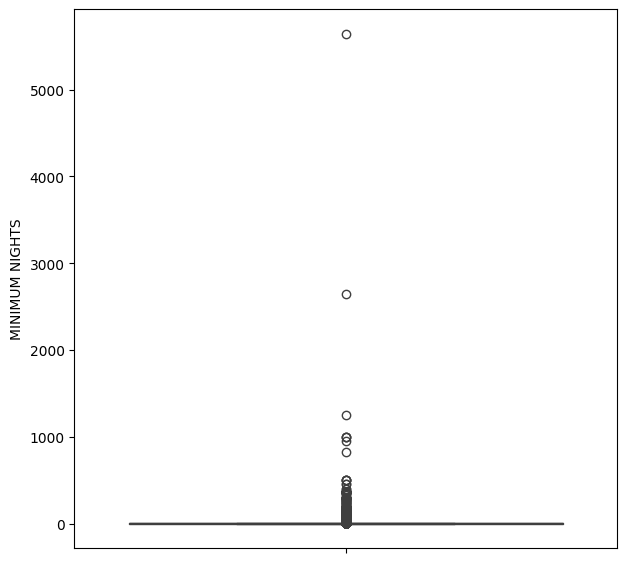

In [19]:
plt.figure(figsize=(7,7))
sns.boxplot (data['MINIMUM NIGHTS'])
plt.show()

# SAVING THE CLEANING DATA

In [21]:



# Save back to the same file
data.to_csv('Airbnb_Open_Data.csv', index=False)


In [25]:
#CONFIRM THE CLEANED DATASET
data

,NAME,HOST ID,HOST_IDENTITY_VERIFIED,HOST NAME,NEIGHBOURHOOD GROUP,NEIGHBOURHOOD,LAT,LONG,COUNTRY,INSTANT_BOOKABLE,CANCELLATION_POLICY,ROOM TYPE,CONSTRUCTION YEAR,PRICE,SERVICE FEE,MINIMUM NIGHTS,NUMBER OF REVIEWS,LAST REVIEW
0,Clean quiet apt home by the park,80014485718,Unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United states,False,Strict,Private room,2020,966.0,193.0,10,9,2021-10-19
1,Skylit midtown castle,52335172823,Verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United states,False,Moderate,Entire home/apt,2007,142.0,28.0,30,45,2022-05-21
3,Nan,85098326012,Unconfirmed,Garry,Brooklyn,Clinton hill,40.68514,-73.95976,United states,True,Moderate,Entire home/apt,2005,368.0,74.0,30,270,2019-07-05
4,Entire apt: spacious studioloft by central park,92037596077,Verified,Lyndon,Manhattan,East harlem,40.79851,-73.94399,United states,False,Moderate,Entire home/apt,2009,204.0,41.0,10,9,2018-11-19
5,Large cozy 1 br apartment in midtown east,45498551794,Verified,Michelle,Manhattan,Murray hill,40.74767,-73.97500,United states,True,Flexible,Entire home/apt,2013,577.0,115.0,3,74,2019-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102040,Room in queens ny near lga.,56457739998,Verified,Sonia,Queens,East elmhurst,40.76245,-73.87938,United states,True,Strict,Private room,2022,982.0,196.0,1,239,2019-06-29
102041,Cozy home away from home,60176837202,Verified,Nan,Queens,Edgemere,40.59380,-73.77373,United states,True,Moderate,Private room,2020,946.0,189.0,1,76,2019-06-27
102042,Central park views - private room bathroom,68411243647,Verified,Nan,Manhattan,Upper west side,40.79712,-73.96117,United states,False,Strict,Private room,2012,706.0,141.0,1,4,2017-08-15
102043,Ultimate 50th floor downtown penthouse - 4000...,95625271612,Verified,Nan,Manhattan,Soho,40.72318,-74.00223,United states,False,Flexible,Entire home/apt,2020,1043.0,209.0,2,21,2019-07-01
